<a href="https://colab.research.google.com/github/weathon/dating-app-pub/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv

--2023-02-13 13:03:37--  https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117447 (115K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 114.69K  --.-KB/s    in 0.02s   

2023-02-13 13:03:37 (6.21 MB/s) - ‘data.csv’ saved [117447/117447]



In [1]:
import pylab
import numpy as np
import pandas as pd
import scipy.stats
df = pd.read_csv("data.csv")
pylab.style.use("default")
pylab.rcParams["figure.figsize"] = (7,7)

In [2]:
def get_options(name):
    return sorted(list(df[name].drop_duplicates()))

def filter(**args):
    res = pd.DataFrame(df)
    for i in args.keys():
        res = res[res[i]==args[i]]
    return res

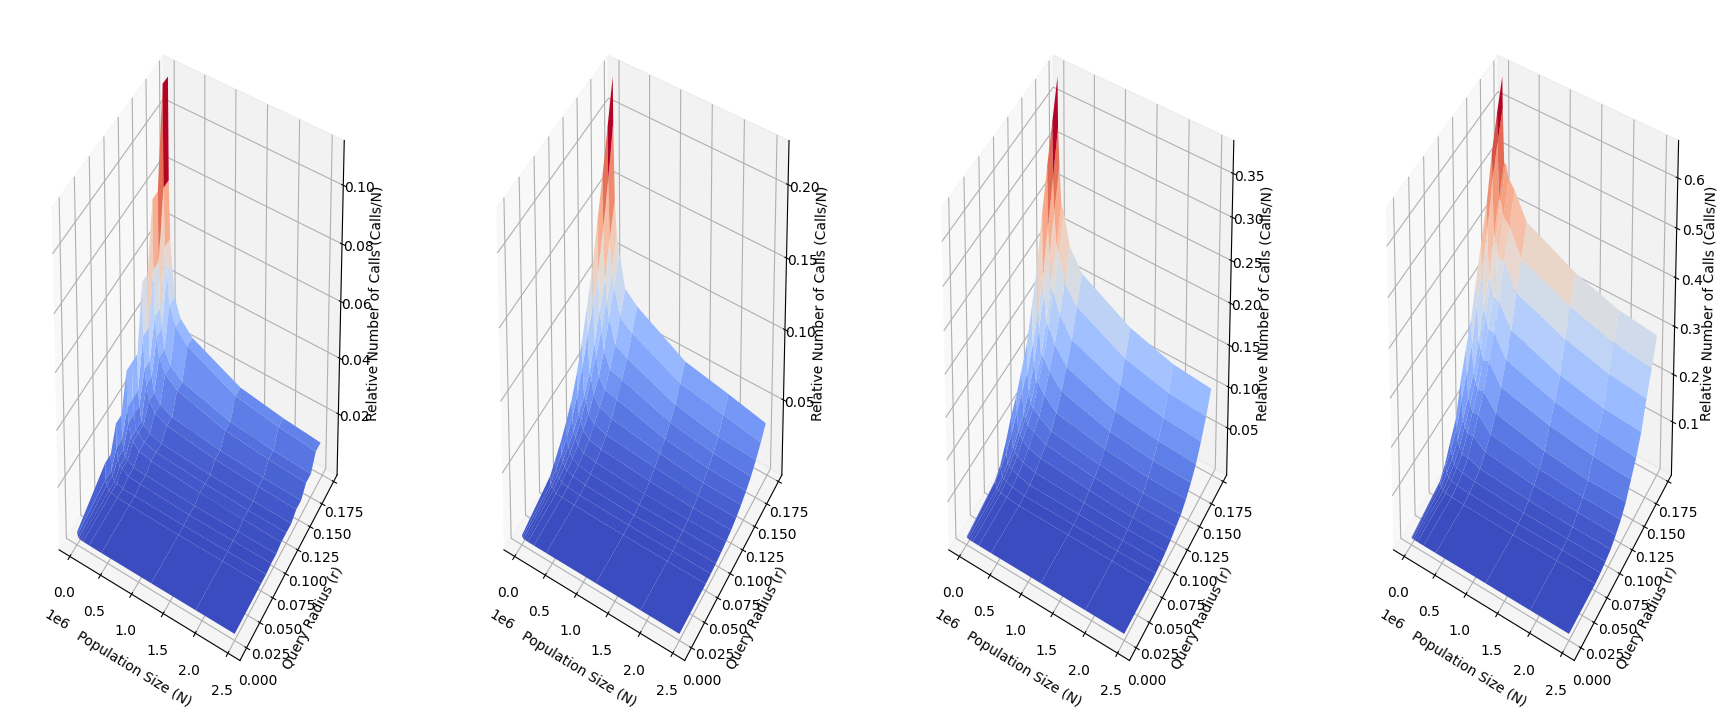

In [29]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(1,4,subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

for LENi in range(len(get_options("len"))):
  p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
  for i in range(len(get_options("N"))):
    for j in range(len(get_options("r"))):
      p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

  X, Y = np.meshgrid(get_options("r"),get_options("N"))
  ax[LENi].plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
  ax[LENi].set_xlabel("Population Size (N)")
  ax[LENi].set_ylabel("Query Radius (r)")
  ax[LENi].set_zlabel("Relative Number of Calls (Calls/N)")
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

Text(0.5, 0.92, 'Scaling when Len=30')

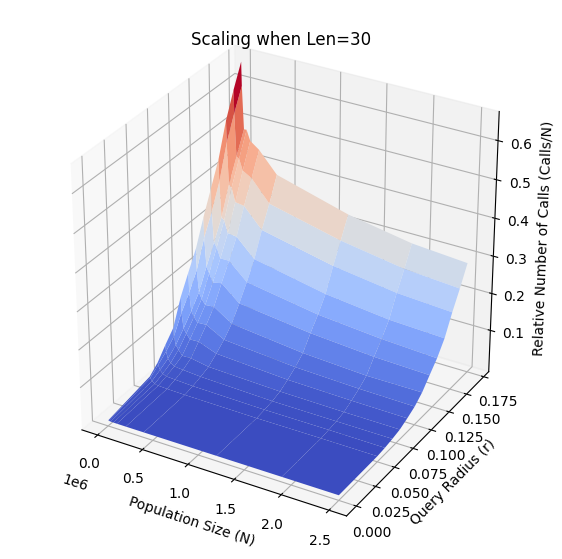

In [48]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = -1
p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("r"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

X, Y = np.meshgrid(get_options("r"),get_options("N"))
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
# ax.view_init(30, 290)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

<ipython-input-50-23a07245d9bb>:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)


ValueError: ignored

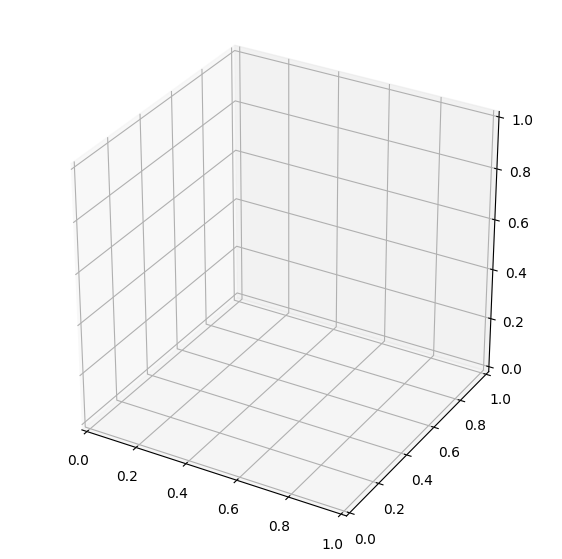

In [50]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = -1
p = np.zeros(shape=(len(get_options("N")),len(get_options("nFound"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("nFound"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("nFound")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

X, Y = np.meshgrid(get_options("r"),get_options("N"))
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
# ax.view_init(30, 290)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [36]:
np.meshgrid([1,2,3],[4,5,6])

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

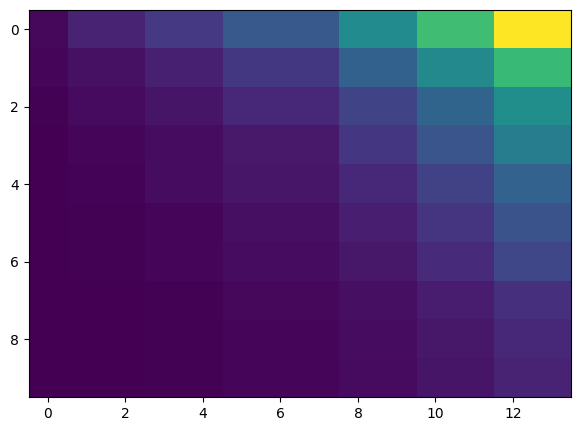

In [51]:
pylab.imshow(p) # last time it seems random because forgot to sort options

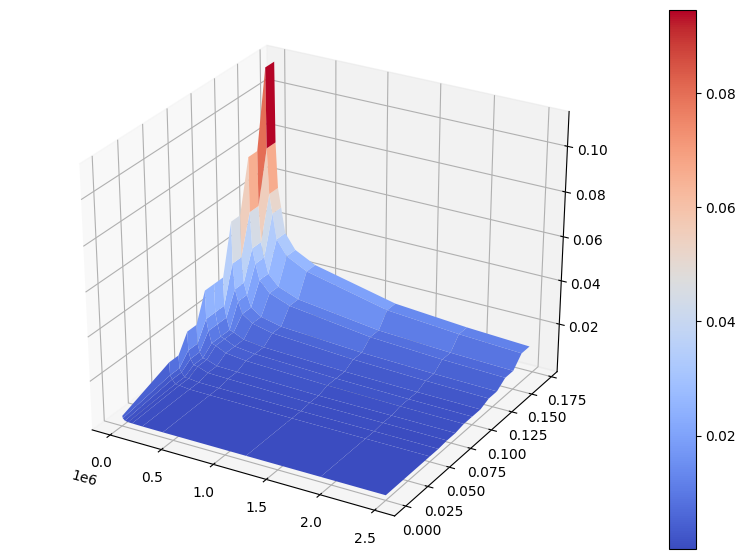

In [60]:
pylab.rcParams["figure.figsize"] = (10,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(get_options("r"),get_options("N"))
fig.colorbar(ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm))
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [ ]:
frame1 = filter(len=10)["Time"]/filter(len=10)["Call Counts"]
frame2 = filter(len=30)["Time"]/filter(len=30)["Call Counts"]
scipy.stats.ttest_rel(frame1,frame2) 

Ttest_relResult(statistic=-2.7116314118589115, pvalue=0.006859808606010733)

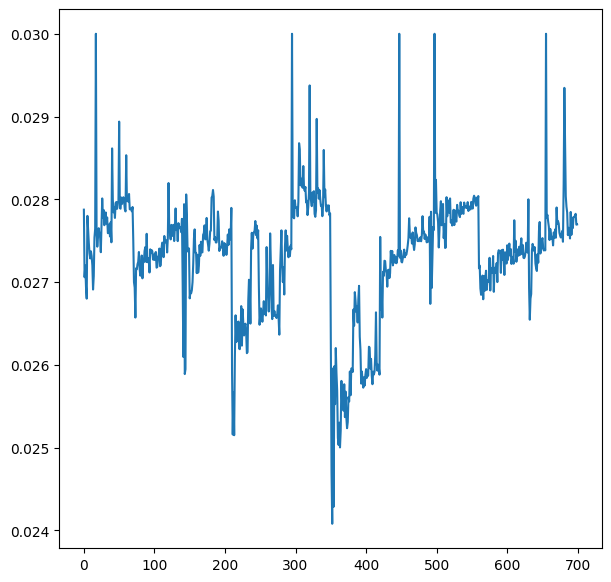

In [ ]:
pylab.plot([i if i<0.03 else 0.03 for i in frame1])

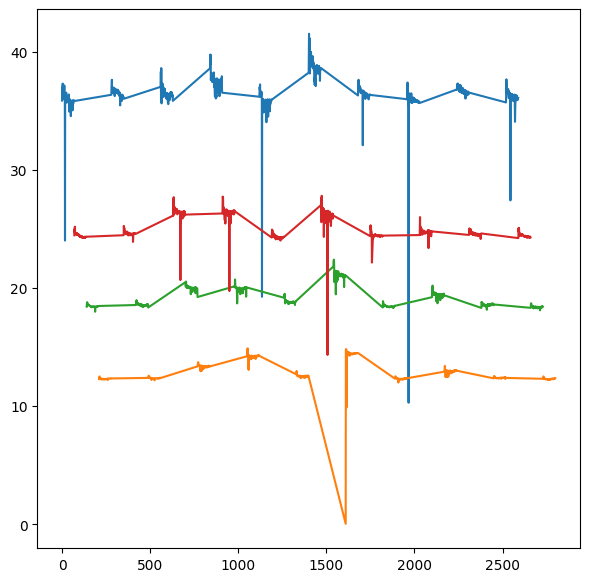

In [ ]:
pylab.plot(filter(len=10)["Call Counts"]/filter(len=10)["Time"])
pylab.plot(filter(len=30)["Call Counts"]/filter(len=30)["Time"])
pylab.plot(filter(len=20)["Call Counts"]/filter(len=20)["Time"])
pylab.plot(filter(len=15)["Call Counts"]/filter(len=15)["Time"])

Text(0, 0.5, 'Call Counts%')

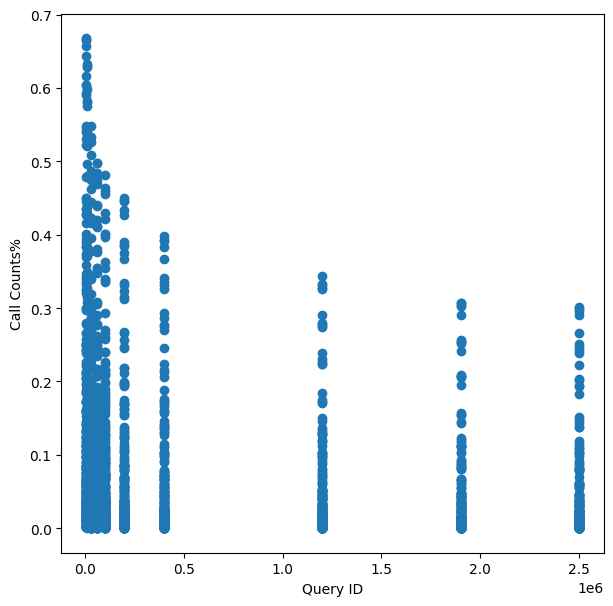

In [ ]:
f = filter() # lengniao surfacechart   N, r, z: call %
pylab.scatter(f["N"],f["Call Counts"]/f["N"])
pylab.title("")
pylab.xlabel("Query ID")
pylab.ylabel("Call Counts%")

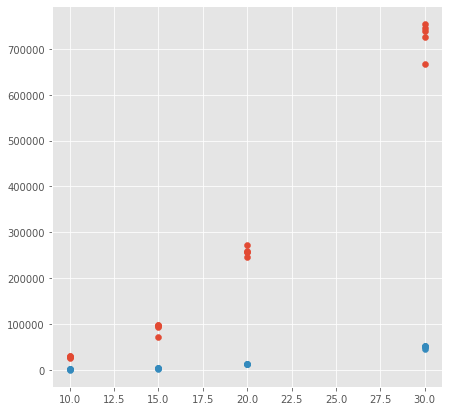

In [ ]:
f = filter(r=0.17, N=2500000)
pylab.scatter(f["len"],f["Call Counts"])
pylab.scatter(f["len"],f["Time"])